Biostat/Biomath M257 Homework 1

Due Apr 19 @ 11:59PM

Tomoki Okuno and 805851067

Show machine information for reproducibility:

In [117]:
versioninfo()

Julia Version 1.10.0
Commit 3120989f39b (2023-12-25 18:01 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  CPU: 8 × Apple M1
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, apple-m1)
  Threads: 2 on 4 virtual cores
Environment:
  DYLD_FALLBACK_LIBRARY_PATH = /Users/tomokiokuno/.julia/artifacts/5902919ba30b97bafa388ca950a351ea32516d26/lib:/Users/tomokiokuno/.julia/artifacts/92b949e2f3a66439c69a8d334fc95810fbd9df9b/lib:/Users/tomokiokuno/.julia/artifacts/5b338c8fa90c05e6faea86e54d2996cca76cfbbe/lib:/Applications/Julia-1.10.app/Contents/Resources/julia/lib/julia:/Users/tomokiokuno/.julia/artifacts/0b234a64c0574e6156c740b15844963c0555164e/lib:/Users/tomokiokuno/.julia/artifacts/9410bad2635eda2239b4a72ba4316c4aa8f5b76e/lib:/Users/tomokiokuno/.julia/artifacts/a7cf2895cac9b6bec2c94e6490ca337e00b12894/lib:/Users/tomokiokuno/.julia/artifacts/10b2b258c07d7a76b2e3331f1ed70d8a8eb6d71c/lib:/Users/tomokiokuno/.juli

Activate environment:

In [118]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
# add packages if needed
# Pkg.add("IJulia")
# Pkg.add(["BenchmarkTools", "LinearAlgebra", "Plots", "Random"])
Pkg.status()

  Activating project at `~/Documents/07_UCLA/Class/257/02_Homework/hw1`


Status `~/Documents/07_UCLA/Class/257/02_Homework/hw1/Project.toml`
  [6e4b80f9] BenchmarkTools v1.5.0
  [7073ff75] IJulia v1.24.2
  [bdcacae8] LoopVectorization v0.12.169
⌃ [91a5bcdd] Plots v1.40.3
  [f27b6e38] Polynomials v4.0.6
  [6f49c342] RCall v0.14.1
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [119]:
## order alphabetically
using LinearAlgebra
using Plots
using Random

## Q1. Git/GitHub

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

    **Solution.** I already have my GitHub account.

2. Create a **private** repository `biostat-m257-2024-spring` and add `Hua-Zhou` and `BrendonChau` (TA) as your collaborators.

    **Solution.** Done.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, `Project.toml`, all code and data set to reproduce results) in the `master` branch. 

    **Solution.** Understood. I created `hw1` in the `main` branch instead of `master` as `main` is the default branch in my setup.

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.

    **Solution.** Sure. I tagged my hw1 submission.

5. Read the [style guide](https://github.com/invenia/BlueStyle) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (1) four space indenting rule, (2) 92 charcter rule, (3) space after comma rule, (4) no space before comma rule, (5) space around binary operator rule.

    **Solution.** I have read it. Also, I have drawn a vertical line at 92 characters to avoid violating it.

## Q2. Computer arithmetics

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

Q2.1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

**Solution**

In [120]:
x, y, z = 0.1, 0.1, 1.0

@show (x + y) + z
@show x + (y + z)
println("Match?: ", (x + y) + z == x + (y + z))

(x + y) + z = 1.2
x + (y + z) = 1.2000000000000002
Match?: false


The two computation results did not match. The discrepancy arises due to floating-point arithmetic and rounding errors. Since floating-point numbers have limited precision, computations involving them may not yield exact results. 

Q2.2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

**Solution**

While the equation mostly holds true, there exists at least one counter-example due to the limitations of floating-point numbers.

In [121]:
x, y, z = 0.1, 0.2, 0.3
@show (x * y) * z
@show x * (y * z)
println("Match?: ", (x * y) * z == x * (y * z))

(x * y) * z = 0.006000000000000001
x * (y * z) = 0.006
Match?: false


We noticed that floating-point numbers do not always obey the associative rule for multiplication, either. Therefore, the answer is **No**.

Q2.3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`? 

**Solution**

There is a counter-example.

In [122]:
a = 0.1
x, y = 0.025, 0.051
@show a * (x + y)
@show a * x + a * y
println("Match?: ", a * (x + y) == a * x + a * y)

a * (x + y) = 0.0076
a * x + a * y = 0.007600000000000001
Match?: false


As expected, floating-point numbers do not necessarily obey the distributive rule. The answer is also **No**.

Q2.4. Is `0 * x == 0` true for all floating-point number `x`? 

**Solution**

I found that, according to the definition in IEEE 754 standard, multiplying any number by 0 results in 0.

In [123]:
x = 1e-100
0 * x == 0

true

Exceptions to this rule include infinity and `NaN`, providing counterexamples.

In [124]:
## infinity case
x = Inf
@show 0 * x
println("Match?: ", 0 * x == 0)

0 * x = NaN
Match?: false


In [125]:
## Not a number case
x = NaN
@show 0 * x
println("Match?: ", 0 * x == 0)

0 * x = NaN
Match?: false


The product of zero and `Inf` and the product of zero and `NaN` are both `NaN`, which makes sense mathematically. Therefore, `0 * x == 0` is not necessarily true, that is, the answer is **No**.

Q2.5. Is `x / a == x * (1 / a)` always true?

**Solution**

To find one counter-example, we do iterative calculation as follows.

In [126]:
## Initialize x and a to store an example where x / a != x * (1 / a)
found_x = 0.0
found_a = 0.0
direct_division_result = 0.0
multiplication_result = 0.0

## Loop through a range of floating-point numbers
for x in 1:10000 
    for a in 1:10000
        x_float = x / 10000.0
        a_float = a / 10000.0
        # Perform direct division
        direct_division = x_float / a_float
        # Perform multiplication after division
        mult_after_div = x_float * (1 / a_float)
        # Check if the results are different
        if direct_division != mult_after_div
            found_x = x_float
            found_a = a_float
            direct_division_result = direct_division
            multiplication_result = mult_after_div
            break  # Exit the loop once an example is found
        end
    end
    if found_x != 0.0  # Check if an example has been found
        break
    end
end

println("x: $found_x, a: $found_a")
println("LHS: $direct_division_result")
println("RHS: $multiplication_result")

x: 0.0001, a: 0.0019
LHS: 0.052631578947368425
RHS: 0.05263157894736842


Sanity check:

In [127]:
x, a = 0.0001, 0.0019
x / a == x * (1 / a)

false

Therefore, `x / a == x * (1 / a)` is also **false**.

## Q3. Multiple dispatch and JIT

Consider Julia function

In [128]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

g (generic function with 1 method)

**Solution**

Q3.1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input. 

In [129]:
@code_llvm g(1)

;  @ In[128]:1 within `g`
define i64 @julia_g_3296(i64 signext %0) #0 {
top:
;  @ In[128]:3 within `g`
; ┌ @ int.jl:88 within `*`
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-`
   %2 = add i64 %1, -2441406
; └
;  @ In[128]:5 within `g`
  ret i64 %2
}


Q3.2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input. 

**Solution**

In [130]:
@code_llvm g(1.0) # default is Float64 

;  @ In[128]:1 within `g`
define double @julia_g_3298(double %0) #0 {
top:
;  @ In[128]:3 within `g`
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:424 within `-` @ float.jl:410
   %10 = fadd double %9, -1.000000e+

Q3.3. Compare the bitcode from questions 1 and 2. Explain what do you find.

**Solution**

Overall, the computation process appears to vary between `Int64` and `Float64` inputs. When floating-point arguments are used, both multiplication (`5k`) and subtraction (`-1`) occur within each iteration of the loop. However, with integer arguments, both calculations are consolidated into a single operation through reordering or combining operations, potentially resulting in greater efficiency.

Specifically, I believe that `9765625` is derived from $5^{10}$ and `-2441406` comes from $- \sum_{i=1}^{10} 5^{i-1}$.

In [131]:
println("%1 = mul calculate ", 5^10)
println("%2 = add calculate ", - sum(5 .^ (0:9)))

%1 = mul calculate 9765625
%2 = add calculate -2441406


Q3.4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

In [132]:
function g_fastmath(k)
    @fastmath for i in 1:10 
        k = 5k - 1
    end
    k
end

g_fastmath (generic function with 1 method)

**Solution**

I read Julia documantation on `@fastmath`. Repeat the Q3.1-3 as follows.

In [133]:
## Repeat Q3.1
@code_llvm g_fastmath(1)

;  @ In[132]:1 within `g_fastmath`
define i64 @julia_g_fastmath_3300(i64 signext %0) #0 {
top:
;  @ In[132]:3 within `g_fastmath`
; ┌ @ fastmath.jl:269 within `mul_fast`
; │┌ @ int.jl:88 within `*`
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:269 within `sub_fast`
; │┌ @ int.jl:86 within `-`
    %2 = add i64 %1, -2441406
; └└
;  @ In[132]:5 within `g_fastmath`
  ret i64 %2
}


In [134]:
## Repeat Q3.2
@code_llvm g_fastmath(1.0)

;  @ In[132]:1 within `g_fastmath`
define double @julia_g_fastmath_3302(double %0) #0 {
top:
;  @ In[132]:3 within `g_fastmath`
; ┌ @ fastmath.jl:266 within `mul_fast` @ fastmath.jl:165
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:266 within `sub_fast` @ fastmath.jl:164
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[132]:5 within `g_fastmath`
  ret double %2
}


(Repeat Q3.2) `g_fastmath` with `Float64` input appears to execute a similar efficient process to `g` and `g_fastmath` with `Int64` input, i.e., only one multiplication and one addition seem to be performed. 

Explain what does the macro `@fastmath` do? And why are the bitcodes for `g` and `g_fastmath` with `Float64` input different? (Hint: Q2)

**Solution**

`@fastmath` allows sacrificing some mathematical rigor for the purpose of accelerating numerical computations. The bitcodes for `g` and `g_fastmath` with `Float64` input are different because the `@fastmath` macro ignores limited precision that floating-point numbers have, as we saw in Q2. In the `g_fastmath` function, the `@fastmath` allows the compiler to apply optimizations such as reordering or combining floating-point operations like with `Int64` input, which may result in a loss of mathematical precision but can lead to faster execution. As a result, `@code_llvm` generated for `g_fastmath` differ from that of `g` due to these optimizations permitted by `@fastmath`.

## Q4. Evaluating a polynomial

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`. 

**Solution**

In [135]:
x = range(0.988, stop = 1.012, step = 0.001)

0.988:0.001:1.012

Check some elements in `x` to see if it works.

In [136]:
println(x[1])
println(x[13])
println(x[25]) # last value

0.988
1.0
1.012


Q4.1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.

**Solution**

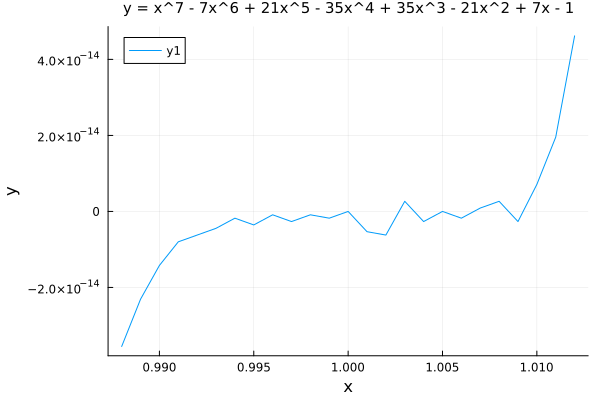

In [137]:
y = x .^ 7 - 7x .^ 6 + 21x .^ 5 - 35x .^ 4 + 35x .^ 3 - 21x .^ 2 + 7x .- 1
plot(x, y, xlabel="x", ylabel="y", # no spaces are required here in Julia
    title="y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1",
    titlefontsize=10)

Note: In Julia, it's a convention not to include spaces around `=` when specifying keyword arguments in a function call.

Q4.2. Plot the polynomial `y = (x - 1)^7` at points `x`. 

**Solution**

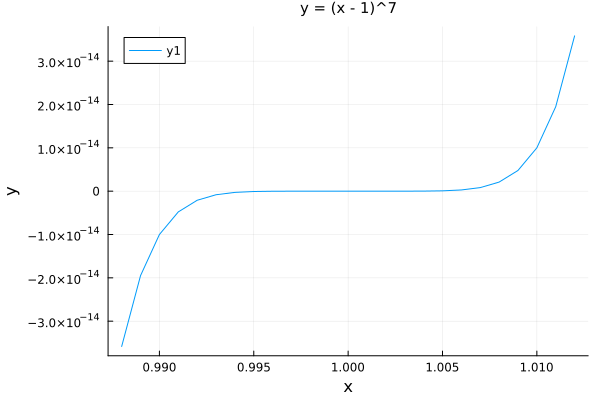

In [138]:
y = (x .- 1).^7
plot(x, y, xlabel="x", ylabel="y", title="y = (x - 1)^7", titlefontsize=10)

Q4.3. Explain what you found.

**Solution**

Clearly, `y = (x - 1)^7` produced smoother and more accurate plots. Conversely, the roughness observed in the other plots can be attributed to cumulative rounding errors stemming from numerous arithmetic operations.

## Q5. Woodbury formula

Demonstrate the following results in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Q5.1. **Sherman-Morrison formula**:
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

**Solution**

Proving this is straightforward. Use the fact that $(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = (\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}(\mathbf{A} + \mathbf{u} \mathbf{u}^T) =\mathbf I_n$.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}
	&= (\mathbf{A} + \mathbf{u} \mathbf{u}^T)\left(\mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}\right) \\
	&= \mathbf I_n
	+ \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}
	- \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} 
	- \frac{(\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1})(\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1})}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\\
	&= \mathbf I_n
	+ \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}(\mathbf{u}^T \mathbf{A}^{-1} \mathbf{u})}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} 
	- \frac{\mathbf{u} (\mathbf{u}^T \mathbf{A}^{-1}\mathbf{u}) \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}}\\
	& = \mathbf I_n
\end{align*}
$$
since $\mathbf{u}^T \mathbf{A}^{-1}\mathbf{u}$ is scalar. The same holds true for $(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1}(\mathbf{A} + \mathbf{u} \mathbf{u}^T) =\mathbf I_n$. Let's demonstrate this formula.

In [139]:
## set dimension
n = 5
## set seed number for reproducibility
Random.seed!(257)

## create random matrix A and vector u
A = rand(n, n)
u = rand(n)

## compute the inverse of A + uu'
inv(A + u * u')

5×5 Matrix{Float64}:
 -3.82769    4.21818   1.49492    1.31681   -3.15513
  2.6669    -1.69853  -0.619175  -0.828194   0.877865
  4.95506   -5.11298  -3.31178    0.051452   4.10314
  0.371063  -1.04998   0.760928  -0.235422   0.636954
 -2.70264    2.38692   1.19319   -0.494644  -0.445729

In [140]:
## check two transpose functions just in case
transpose(u) == u'

true

In [141]:
## compute Sherman-Morrison formula
inv(A) - inv(A) * u * u' * inv(A) / (1 + u' * inv(A) * u)

5×5 Matrix{Float64}:
 -3.82769    4.21818   1.49492    1.31681   -3.15513
  2.6669    -1.69853  -0.619175  -0.828194   0.877865
  4.95506   -5.11298  -3.31178    0.051452   4.10314
  0.371063  -1.04998   0.760928  -0.235422   0.636954
 -2.70264    2.38692   1.19319   -0.494644  -0.445729

In [142]:
## check for approximate equality 
isapprox(inv(A + u * u'), inv(A) - inv(A) * u * u' * inv(A) / (1 + u' * inv(A) * u))

true

The two calculation results did not match numerically, but they were nearly identical as expected.

Q5.2. **Woodbury formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solution**

The mathmetical proof is similar to part 1 which is a special case of part 2.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1}
	&= (\mathbf{A} + \mathbf{U} \mathbf{V}^T)\left[\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}
	- \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U}(\mathbf I_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T\mathbf{A}^{-1} \\
	&= \mathbf I_n.
\end{align*}
$$

In [143]:
## set dimension
n = 5
m = 2

## create random matrices A, U, V and a random vector u
A = rand(n, n)
U = rand(n, m)
V = rand(n, m)

## compute the inverse of A + UV'
inv(A + U * V')

5×5 Matrix{Float64}:
  0.373407   1.51113   -1.16456     0.477848   -1.10055
  1.00656   -0.663587   0.0205683   0.0376375   0.0107823
  1.07471    4.91673    0.103028   -3.19645    -2.94872
 -0.937604  -3.23361   -0.0723489   0.889171    3.12412
 -1.16993   -1.63572    1.36117     1.22144     0.813584

In [144]:
## compute Woodbury formula
inv(A) - inv(A) * U * inv(I + V' * inv(A) * U) * V' * inv(A)

5×5 Matrix{Float64}:
  0.373407   1.51113   -1.16456     0.477848   -1.10055
  1.00656   -0.663587   0.0205683   0.0376375   0.0107823
  1.07471    4.91673    0.103028   -3.19645    -2.94872
 -0.937604  -3.23361   -0.0723489   0.889171    3.12412
 -1.16993   -1.63572    1.36117     1.22144     0.813584

In [145]:
## check for approximate equality 
isapprox(inv(A + U * V'), inv(A) - inv(A) * U * inv(I + V' * inv(A) * U) * V' * inv(A))

true

We were able to confirm the equality, ignoreing precision.

Q5.3. **Binomial inversion formula**:
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

**Solution**

Note $\mathbf{B} \in \mathbb{R}^{m \times m}$. The proof is almost the same as part 2, which is a special case of part 3.

$$
\begin{align*}
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1}
	&= (\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)\left[\mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\right] \\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} 
	- \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n
	+ \mathbf{U} \mathbf{B} \mathbf{V}^T\mathbf{A}^{-1}
	- \mathbf{U}\mathbf{B}(\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1}\\
	&= \mathbf I_n.
\end{align*}
$$

In [146]:
## create a random (nonsingular) matrix B
B = rand(m, m)

## compute the inverse of A + UBV'
inv(A + U * B * V')

5×5 Matrix{Float64}:
  0.610104   1.71819   -1.30789     0.179619   -1.11653
  1.00051   -0.661407   0.0346982   0.0642083   0.0057859
  0.710453   4.66652    0.419405   -2.56407    -2.97362
 -0.711941  -3.05617   -0.236954    0.554235    3.12333
 -1.32588   -1.78823    1.43312     1.37724     0.835729

In [147]:
## compute the Binomial inversion formula
inv(A) - inv(A) * U * inv(inv(B) + V' * inv(A) * U) * V' * inv(A)

5×5 Matrix{Float64}:
  0.610104   1.71819   -1.30789     0.179619   -1.11653
  1.00051   -0.661407   0.0346982   0.0642083   0.0057859
  0.710453   4.66652    0.419405   -2.56407    -2.97362
 -0.711941  -3.05617   -0.236954    0.554235    3.12333
 -1.32588   -1.78823    1.43312     1.37724     0.835729

In [148]:
## check for approximate equality
LHS = inv(A + U * B * V')
RHS = inv(A) - inv(A) * U * inv(inv(B) + V' * inv(A) * U) * V' * inv(A)
isapprox(LHS, RHS)

true



Q5.4. **Determinant identity**:
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Solution**

First, need to show an important determinant proporty: $\det(\mathbf I_n + \mathbf{PQ}) = \det(\mathbf I_m + \mathbf{QP})$, where $\mathbf P\in\mathbb R^{n\times m}$ and $\mathbf Q\in\mathbb R^{m\times n}$.
$$
\begin{align*}
    |\mathbf I_n + \mathbf{PQ}| &=
    \begin{vmatrix}
    \mathbf I_n + \mathbf{PQ} & \mathbf O_{n\times m}\\
    \mathbf Q & \mathbf I_m
    \end{vmatrix}\\
    &= \begin{vmatrix}
    \mathbf I_n & \mathbf P\\
    \mathbf O_{m\times n} & \mathbf I_m
    \end{vmatrix}
    \begin{vmatrix}
    \mathbf I_n & - \mathbf P\\
    \mathbf Q & \mathbf I_m
    \end{vmatrix}\\
    &= \begin{vmatrix}
    \mathbf I_n & - \mathbf P\\
    \mathbf Q & \mathbf I_m
    \end{vmatrix}
    \begin{vmatrix}
    \mathbf I_n & \mathbf P\\
    \mathbf O_{m\times n} & \mathbf I_m
    \end{vmatrix}\\
    &= \begin{vmatrix}
    \mathbf I_n & \mathbf O_{n\times m}\\
    \mathbf Q & \mathbf I_m + \mathbf{QP}
    \end{vmatrix}\\
    &= |\mathbf I_m + \mathbf{QP}|,
\end{align*}
$$
where $|\cdot| = \det(\cdot)$. Also, since $\mathbf A$ is nonsingular, $\mathbf A^{-1/2}$ exists. Using them, we can show the determinant identity as follows.
$$
\begin{align*}
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T)
	&= \det(\mathbf{A}^{1/2}) \text{det}(\mathbf{I}_n + \mathbf A^{-1/2}\mathbf{U} \mathbf{V}^T\mathbf A^{-1/2})\det(\mathbf{A}^{1/2})\\
	&= \det(\mathbf{A}) \det(\mathbf{I}_m + \mathbf{V}^T\mathbf A^{-1/2}\mathbf A^{-1/2}\mathbf{U})\\
	&= \det(\mathbf{A}) \det(\mathbf{I}_m + \mathbf{V}^T\mathbf A^{-1}\mathbf{U}).
\end{align*}
$$

In [149]:
## demonstrate this formula
println("LHS: ", det(A + U * V'))
println("RHS: ", det(A) * det(I + V' * inv(A) * U))
isapprox(det(A + U * V'), det(A) * det(I + V' * inv(A) * U))

LHS: 0.15356538499616754
RHS: 0.15356538499616754


true

We see that the two determinant forms were almost identical.

## Q6. Triangular matrix and orthogonal matrix

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one numerical example for each fact). Mathematically curious ones are encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

Q6.1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

**Solution**

We can prove this even though the two confortable matrices are *not* square. Let $\mathbf A = (a_{ij}) \in\mathbb R^{p\times q}$ and $\mathbf B = (b_{jk}) \in\mathbb R^{q\times r}$ be both upper triangular matrices. In other words, we have $a_{ij} = 0 \ (i > j)$ and $b_{jk} = 0 \ (j > k)$. Further let $\mathbf C = \mathbf{AB} = (c_{ik}) \in\mathbb R^{p\times r}$.

If $i > q$, then
$$
\begin{align*}
    c_{ik} = \sum_{j=1}^q a_{ij} b_{jk} = 0 \quad\because a_{ij} = 0.
\end{align*}
$$
regardless of $k$.

If $q \ge i > k$, then
$$
\begin{align*}
    c_{ik}
    &= \sum_{j=1}^q a_{ij} b_{jk}\\
    &= \sum_{j=1}^{i-1} a_{ij} b_{jk} + \sum_{j=i}^{q} a_{ij} b_{jk}\\
    &= \sum_{j=1}^{i-1} 0 \cdot b_{jk} + \sum_{j=i}^{q} a_{ij} \cdot 0\\
    &= 0.
\end{align*}
$$
Therefore, at least $c_{ik} = 0$ for $i > k$, i.e., $\mathbf C$ is also upper triangular. Taking transpose shows the lower triangular case, that is, $\mathbf C' = \mathbf B'\mathbf A'$ is lower triangular, equaling the product of the two lower trangular matrices $\mathbf B'$ and $\mathbf A'$. Let's demonstrate it.

In [150]:
## set dimension
n = 5

## create random upper triangular matrices A and B
A = UpperTriangular(rand(n, n))
B = UpperTriangular(rand(n, n))

## display A and B
display(A)
display(B)

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.425947  0.731078  0.885057   0.476868  0.692699
  ⋅        0.828167  0.967795   0.413354  0.968143
  ⋅         ⋅        0.0234682  0.734419  0.322677
  ⋅         ⋅         ⋅         0.866914  0.357313
  ⋅         ⋅         ⋅          ⋅        0.245642

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.602258  0.0774286  0.288015  0.133871  0.0100881
  ⋅        0.483782   0.594619  0.184243  0.387776
  ⋅         ⋅         0.838292  0.393069  0.53447
  ⋅         ⋅          ⋅        0.70931   0.946716
  ⋅         ⋅          ⋅         ⋅        0.541683

In [151]:
## The product of two upper triangular matrices
A * B

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.25653  0.386663  1.29933    0.877854  1.58751
  ⋅       0.400652  1.30374    0.82619   1.75416
  ⋅        ⋅        0.0196732  0.530156  0.882618
  ⋅        ⋅         ⋅         0.614911  1.01427
  ⋅        ⋅         ⋅          ⋅        0.13306

Indeed, the product is also upper triangular. The same is true for lower triangular matrices:

In [152]:
## lower matrix version
A = LowerTriangular(rand(n, n))
B = LowerTriangular(rand(n, n))
display(A)
display(B)
A * B

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.879451    ⋅          ⋅         ⋅         ⋅ 
 0.0830385  0.626766    ⋅         ⋅         ⋅ 
 0.434459   0.803158   0.782676   ⋅         ⋅ 
 0.904537   0.677514   0.250751  0.240586   ⋅ 
 0.608166   0.0693748  0.911192  0.473114  0.872682

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.299737    ⋅          ⋅         ⋅         ⋅ 
 0.0613531  0.929449    ⋅         ⋅         ⋅ 
 0.477315   0.0684691  0.684837   ⋅         ⋅ 
 0.288604   0.478944   0.477802  0.9158     ⋅ 
 0.29543    0.0373603  0.189718  0.592968  0.152191

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.263604    ⋅         ⋅         ⋅         ⋅ 
 0.0633438  0.582547   ⋅         ⋅         ⋅ 
 0.553083   0.800083  0.536005   ⋅         ⋅ 
 0.501813   0.762111  0.286676  0.220329   ⋅ 
 1.01583    0.386067  1.01564   0.95075   0.132814

Q6.2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

**Solution**

Find $\mathbf A \mathbf B$ such that $\mathbf{AB} = \mathbf I_n$, where $\mathbf A \in \mathbb R^{n\times n}$ is an upper triangular matrix. Let $\mathbf b_j$ be the $j$-th column of $\mathbf B$, then we have
$$\begin{align*}
    \begin{pmatrix}
        a_{11} & \cdots & a_{1j} & \cdots & a_{1, n-1} & a_{1n}\\
        \vdots  &  \ddots & \vdots & \vdots & \vdots & \vdots\\
        0 &  \cdots & a_{jj} & \cdots & a_{j, n-1} & a_{jn}\\
        \vdots & \ddots & \vdots & \ddots & \vdots & \vdots\\
        0 & \cdots & 0 & \cdots & a_{n-1, n-1} & a_{n-1, n}\\
        0 & \cdots & 0 & \cdots & 0 & a_{nn}
    \end{pmatrix}
    \begin{pmatrix}
        b_{1j}\\
        \vdots\\
        b_{jj}\\
        \vdots\\
        b_{n-1, j}\\
        b_{nj}
    \end{pmatrix}
    = \begin{pmatrix}
        0\\
        \vdots\\
        1\\
        \vdots\\
        0\\
        0
    \end{pmatrix}.
\end{align*}
$$
Note that $a_{jj} \ne 0$ for all $j = 1, \ldots, n$ since otherwise $\mathbf A$ is not invertible ($\det\mathbf A=0$).

The backward calculation up to $j+1$ th row gives $b_{nj} = b_{n-1, j} = \cdots = b_{j+1, j} = 0$, i.e., $b_{ij} = 0$ for $i > j$. This means that $\mathbf B = \mathbf A^{-1}$ is also upper triangular. Taking transpose shows the lower triangular case, i.e., consider $\mathbf{B}'\mathbf{A}' = \mathbf I_n$ and $\mathbf B' = \mathbf A^{-T}$. The demonstration results for upper and lower matrices are shown below.

In [153]:
## set dimension
n = 5

## create random upper triangular matrix A
A = UpperTriangular(rand(n, n))
display(A)
## obtain inverse of A
display(inv(A))

## create random lower triangular matrix A
B = LowerTriangular(rand(n, n))
display(B)
## obtain inverse of A
display(inv(B))

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 0.667828  0.0218884  0.834666  0.487758  0.0672113
  ⋅        0.041714   0.104706  0.730054  0.138238
  ⋅         ⋅         0.998044  0.420132  0.566779
  ⋅         ⋅          ⋅        0.128317  0.1946
  ⋅         ⋅          ⋅         ⋅        0.623401

5×5 UpperTriangular{Float64, Matrix{Float64}}:
 1.49739  -0.785719  -1.16984     2.60869   0.262052
  ⋅       23.9728    -2.51502  -128.158    36.9762
  ⋅         ⋅         1.00196    -3.28059   0.113111
  ⋅         ⋅          ⋅          7.79321  -2.43272
  ⋅         ⋅          ⋅           ⋅        1.6041

5×5 LowerTriangular{Float64, Matrix{Float64}}:
 0.516204   ⋅          ⋅           ⋅         ⋅ 
 0.303587  0.0151006   ⋅           ⋅         ⋅ 
 0.565507  0.90058    0.690825     ⋅         ⋅ 
 0.904174  0.0502866  0.00316535  0.580266   ⋅ 
 0.458485  0.996533   0.84066     0.95842   0.140852

5×5 LowerTriangular{Float64, Matrix{Float64}}:
   1.93722       ⋅        ⋅             ⋅        ⋅ 
 -38.9464      66.2226    ⋅             ⋅        ⋅ 
  49.1859     -86.3297   1.44754        ⋅        ⋅ 
   0.0882512   -5.268   -0.00789634    1.72335   ⋅ 
 -24.9197      82.5682  -8.58577     -11.7264   7.09964

These demonstrations are consistent with the mathematical argument.

Q6.3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

**Solution**

The proof is the same as Q.6.1 since a unit upper triangular matrix is a special cases of an upper triangular matrix.

In [154]:
## Unit` upper triangular matrices A and B
A = UnitUpperTriangular(rand(n, n))
B = UnitUpperTriangular(rand(n, n))
display(A)
display(B)

## obtain the product
A * B

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.963476  0.84303   0.496946  0.269768
  ⋅   1.0       0.859301  0.528045  0.569842
  ⋅    ⋅        1.0       0.909628  0.313793
  ⋅    ⋅         ⋅        1.0       0.894396
  ⋅    ⋅         ⋅         ⋅        1.0

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.838192  0.899316  0.113691  0.921796
  ⋅   1.0       0.679782  0.011614  0.873357
  ⋅    ⋅        1.0       0.436755  0.294433
  ⋅    ⋅         ⋅        1.0       0.00806101
  ⋅    ⋅         ⋅         ⋅        1.0

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  1.80167  2.3973   0.990025  2.28524
  ⋅   1.0      1.53908  0.914963  1.70046
  ⋅    ⋅       1.0      1.34638   0.615559
  ⋅    ⋅        ⋅       1.0       0.902457
  ⋅    ⋅        ⋅        ⋅        1.0

In [155]:
## `Unit` lower triangular matrices A and B
A = UnitLowerTriangular(rand(n, n))
B = UnitLowerTriangular(rand(n, n))
display(A)
display(B)
A * B

5×5 UnitLowerTriangular{Float64, Matrix{Float64}}:
 1.0        ⋅          ⋅         ⋅         ⋅ 
 0.728427  1.0         ⋅         ⋅         ⋅ 
 0.416968  0.711463   1.0        ⋅         ⋅ 
 0.453588  0.46308    0.376572  1.0        ⋅ 
 0.352945  0.0586231  0.825716  0.577144  1.0

5×5 UnitLowerTriangular{Float64, Matrix{Float64}}:
 1.0         ⋅         ⋅         ⋅         ⋅ 
 0.0742389  1.0        ⋅         ⋅         ⋅ 
 0.115106   0.194098  1.0        ⋅         ⋅ 
 0.0787194  0.822163  0.113169  1.0        ⋅ 
 0.446944   0.220059  0.839607  0.520315  1.0

5×5 UnitLowerTriangular{Float64, Matrix{Float64}}:
 1.0        ⋅         ⋅         ⋅        ⋅ 
 0.802666  1.0        ⋅         ⋅        ⋅ 
 0.584893  0.905561  1.0        ⋅        ⋅ 
 0.610032  1.35833   0.489741  1.0       ⋅ 
 0.944718  0.913458  1.73064   1.09746  1.0

Q6.4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

**Solution**

The proof is almost the same as Q.6.2 except for additoinal equation, which holds $b_{jj} = 1$ by $a_{jj}=1$ for all $j = 1, \ldots, n$ in this case.

In [156]:
## create random unit upper triangular matrix A
A = UnitUpperTriangular(rand(n, n))
display(A)
display(inv(A))

## create random unit lower triangular matrix A
B = UnitLowerTriangular(rand(n, n))
display(B)
display(inv(B))

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  0.859694  0.254385  0.698187  0.906472
  ⋅   1.0       0.115927  0.98563   0.481634
  ⋅    ⋅        1.0       0.873746  0.923392
  ⋅    ⋅         ⋅        1.0       0.712468
  ⋅    ⋅         ⋅         ⋅        1.0

5×5 UnitUpperTriangular{Float64, Matrix{Float64}}:
 1.0  -0.859694  -0.154723   0.284341  -0.552128
  ⋅    1.0       -0.115927  -0.88434    0.255476
  ⋅     ⋅         1.0       -0.873746  -0.300875
  ⋅     ⋅          ⋅         1.0       -0.712468
  ⋅     ⋅          ⋅          ⋅         1.0

5×5 UnitLowerTriangular{Float64, Matrix{Float64}}:
 1.0        ⋅         ⋅         ⋅         ⋅ 
 0.15663   1.0        ⋅         ⋅         ⋅ 
 0.295579  0.261007  1.0        ⋅         ⋅ 
 0.114833  0.80242   0.68272   1.0        ⋅ 
 0.515407  0.952826  0.530892  0.756613  1.0

5×5 UnitLowerTriangular{Float64, Matrix{Float64}}:
  1.0         ⋅          ⋅          ⋅         ⋅ 
 -0.15663    1.0         ⋅          ⋅         ⋅ 
 -0.254698  -0.261007   1.0         ⋅         ⋅ 
  0.184737  -0.624226  -0.68272    1.0        ⋅ 
 -0.370724  -0.341962  -0.014337  -0.756613  1.0

Q6.5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

**Solution**

Assume that $\mathbf Q$ is an orthogonal upper (lower) triangular matrix. By definition, we have $\mathbf Q' = \mathbf Q^{-1}$. By Q6.2, $\mathbf Q^{-1}$ is also upper (lower) triangular. However, $\mathbf Q'$ is lower (upper) triangluar, suggesting that $\mathbf Q$ must be diagonal to satisfy $\mathbf Q' = \mathbf Q^{-1}$.

Q6.6. The product of two orthogonal matrices is orthogonal.

**Solution**

Mathemetical proof is straightforward. Assume that $\mathbf Q_1$ and $\mathbf Q_2$ are orthogonal, then by definition,
$$
\begin{align*}
\mathbf Q_1\mathbf Q_2(\mathbf Q_1\mathbf Q_2)' &= \mathbf Q_1(\mathbf Q_2\mathbf Q_2')\mathbf Q_1' = \mathbf Q_1\mathbf Q_1' = \mathbf I\\
(\mathbf Q_1\mathbf Q_2)'\mathbf Q_1\mathbf Q_2 &= \mathbf Q_2'(\mathbf Q_1'\mathbf Q_1)\mathbf Q_2 = \mathbf Q_2'\mathbf Q_2 = \mathbf I,
\end{align*}
$$
proving that $\mathbf Q_1\mathbf Q_2$ is also orthogonal by definition.

For the demonstration, we use the QR decomposition to obtain two orthogonal matrices.

In [157]:
## get Q1 by QR decomposition
A = rand(n, n)
Q1, R1 = qr(A)

## get Q2 by QR decomposition
B = rand(n, n)
Q2, R2 = qr(A)

## check for the orthogonality of Q = Q1 * Q2
Q = Q1 * Q2
println("QQ' = I? ", isapprox(Q * Q', I))
println("Q'Q = I? ", isapprox(Q' * Q, I))

QQ' = I? true
Q'Q = I? true


The orthogonality of $\mathbf Q = \mathbf Q_1\mathbf Q_2$ was shown by checking the definition.

## Q7. Looping

Let the $n \times n$ matrix `H` have elements `H[i, j] = 1 / (i + j - 1)`.  

Q7.1. Write a function `h(n)` that outputs $n \times n$ matrix `H`. Try at least 4 ways, e.g., $ij$-looping, $ji$-looping, [comprehension](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions), and vectorization (R style). Compute and print `H` for `n = 5`.   

**Solution**

In [158]:
## 1. ij-looping
function h1(n)
    H = Matrix{Float64}(undef, n, n)
    for i in 1:n
        for j in 1:n
            H[i, j] = 1 / (i + j - 1)
        end
    end
    return H
end
h1(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [159]:
## 2. ji-looping
function h2(n)
    H = Matrix{Float64}(undef, n, n)
    for j in 1:n
        for i in 1:n
            H[i, j] = 1 / (i + j - 1)
        end
    end
    return H
end
h2(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [160]:
## 3. comprehension
function h3(n)
    [1 / (i + j - 1) for i in 1:n, j in 1:n]
end
h3(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [161]:
## 4. vectorization (R style)
H = Matrix{Float64}(undef, n, n)
function h4(n)
    i = 1:n
    # j = 1:n
    # return 1 ./ (i' .+ j .- 1)
    return 1 ./ (i' .+ i .- 1)
end
h4(5)

5×5 Matrix{Float64}:
 1.0       0.5       0.333333  0.25      0.2
 0.5       0.333333  0.25      0.2       0.166667
 0.333333  0.25      0.2       0.166667  0.142857
 0.25      0.2       0.166667  0.142857  0.125
 0.2       0.166667  0.142857  0.125     0.111111

In [162]:
# ## 5. LoopVectorization.@turbo
# using LoopVectorization
# function h5(n)
#     H = Matrix{Float64}(undef, n, n)
#     @turbo for i in 1:n, j in 1:n
#         H[i, j] = 1 / (i + j - 1)
#     end
#     return H
# end
# h5(5)


Q7.2. Compare their speed and memory efficiencies using `BenchmarkTools.jl` at `n = 5000`.

**Solution**

In [163]:
using BenchmarkTools
n = 5000
# Initialize a dictionary to store benchmark results
benchmark_result = Dict() 

Dict{Any, Any}()

In [164]:
bm1 = @benchmark h1($n)
display(bm1)

## store median runtime (in milliseconds) and memory (in MB)
benchmark_result["1. ij-looping"] = median(bm1.times) / 1e6, bm1.memory / 1e6

BenchmarkTools.Trial: 46 samples with 1 evaluation.
 Range (min … max):  100.061 ms … 188.636 ms  ┊ GC (min … max): 0.00% … 45.00%
 Time  (median):     105.949 ms               ┊ GC (median):    2.72%
 Time  (mean ± σ):   109.975 ms ±  16.768 ms  ┊ GC (mean ± σ):  5.46% ±  8.80%

  ▄ █▆▃▄▁                                                        
  █▄█████▆▄▆▄▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▁▁▁▄ ▁
  100 ms           Histogram: frequency by time          189 ms <

 Memory estimate: 190.73 MiB, allocs estimate: 2.

(105.948958, 200.000048)

In [165]:
bm2 = @benchmark h2($n)
display(bm2)

## store median runtime (in milliseconds) and memory (in MB)
benchmark_result["2. ji-looping"] = median(bm2.times) / 1e6, bm2.memory / 1e6

BenchmarkTools.Trial: 160 samples with 1 evaluation.
 Range (min … max):  27.765 ms … 111.838 ms  ┊ GC (min … max): 0.00% … 74.41%
 Time  (median):     30.599 ms               ┊ GC (median):    5.51%
 Time  (mean ± σ):   31.337 ms ±   8.830 ms  ┊ GC (mean ± σ):  9.04% ±  9.64%

    █               ▁ ▂                                         
  ▄▇██▆▁▃▂▂▃▃▂▁▁▁▂▃▆█▆█▆▃▃▃▁▂▁▁▂▁▂▃▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂ ▂
  27.8 ms         Histogram: frequency by time         40.5 ms <

 Memory estimate: 190.73 MiB, allocs estimate: 2.

(30.5995, 200.000048)

In [ ]:
bm3 = @benchmark h3($n)
display(bm3)

## store median runtime (in milliseconds) and memory (in MB)
benchmark_result["3. comprehension"] = median(bm3.times) / 1e6, bm3.memory / 1e6

In [ ]:
bm4 = @benchmark h4($n)
display(bm4)

## store median runtime (in milliseconds) and memory (in MB)
benchmark_result["4. vectorization"] = median(bm4.times) / 1e6, bm4.memory / 1e6

In [ ]:
# bm5 = @benchmark h5($n)
# display(bm5)
# benchmark_result["5. LoopVectorization.@turbo"] = median(bm5.times) / 1e6, bm5.memory

In [ ]:
sorted_results = sort(collect(benchmark_result), by=x->parse(Int, split(x.first, ".")[1]))
for (name, result) in sorted_results
    println("$name => $result")
end

We observed that `ji-looping` was significantly faster than `ij-looping`, as arrays are stored in column-major order in Julia, making column-wise access (`ji-looping`) generally more efficient. Additionally, both `comprehension` and `vectorization` outperformed `ji-looping`. In terms of memory usage, all functions consumed the same amount